In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset.  Replace with your actual file path.
df = pd.read_csv('/content/sp500_final_cleaned_no_missing_dropped.csv')  # Or your file path
print("Dataset loaded successfully.")


# Show the first 5 rows
print(df.head())

# Show all columns
print("\nColumns:", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Dataset loaded successfully.
      Close  Daily_Return  Momentum_10d  Volatility_14d  High_Low_Range  \
0   77.5325      0.015735          2.19        0.011365          1.5150   
1   83.9600      0.046927          8.14        0.018763          2.2100   
2   93.7000      0.025293         -2.23        0.019411          2.0450   
3  188.5600     -0.004296          5.15        0.019287          2.1700   
4  367.5100      0.010639         17.75        0.016594          5.6899   

   Open_Close_Change     SMA_10    SMA_20    EMA_10    EMA_20  ...  MACD  \
0            -1.1225   78.14075   79.2460   77.5325   77.5325  ...   0.0   
1             0.4600   89.87200   90.6865   83.9600   83.9600  ...   0.0   
2             1.1400   91.63700   91.5120   93.7000   93.7000  ...   0.0   
3             0.4300  187.84200  194.9890  188.5600  188.5600  ...   0.0   
4             2.4900  368.92500  377.0740  367.5100  367.5100  ...   0.0   

   Signal_Line  Sharpe_Ratio  Drawdown  Symbol                 

In [ ]:
# prompt: no. of data points

print("\nNumber of data points:", len(df))



Number of data points: 387106


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])



# Now proceed with your feature selection and scaling
# 1. Feature Selection
selected_features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'High_Low_Range', 'Open_Close_Change',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line', 'Sharpe_Ratio', 'Drawdown',
    'PE_Ratio',  'ROE', 'Market_Cap', 'Close'
]

X = df[selected_features]

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Optional: Turn scaled data back into DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# 4. Add identifier columns back (Symbol, Date) for tracking
X_scaled['Symbol'] = df['Symbol'].values
X_scaled['Date'] = df['Date'].values
# 1. Feature Selection
selected_features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'High_Low_Range', 'Open_Close_Change',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line', 'Sharpe_Ratio', 'Drawdown',
    'PE_Ratio',  'ROE', 'Market_Cap', 'Close'
]

X = df[selected_features]

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Optional: Turn scaled data back into DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# 4. Add identifier columns back (Symbol, Date) for tracking
X_scaled['Symbol'] = df['Symbol'].values
X_scaled['Date'] = df['Date'].values

# 5. Save preprocessed dataset
X_scaled.to_csv('/content/sp500-3.csv', index=False)

print("✅ Final preprocessing complete. Dataset ready! Shape:", X_scaled.shape)


✅ Final preprocessing complete. Dataset ready! Shape: (387106, 20)


In [ ]:
# 1. Load the preprocessed dataset
df['Date'] = pd.to_datetime(df['Date'])

# 2. Split by date
train_df = df[df['Date'] < '2025-01-01'].copy()
test_df = df[df['Date'] >= '2025-01-01'].copy()

# 3. Output shapes
print("✅ Training set shape:", train_df.shape)
print("✅ Testing set shape:", test_df.shape)
print("📅 Training date range:", train_df['Date'].min().date(), "to", train_df['Date'].max().date())
print("📅 Testing date range:", test_df['Date'].min().date(), "to", test_df['Date'].max().date())


✅ Training set shape: (368146, 21)
✅ Testing set shape: (18960, 21)
📅 Training date range: 2020-05-08 to 2024-12-31
📅 Testing date range: 2025-01-02 to 2025-03-31



✅ Silhouette Score (sample of 60000): 0.4568

📊 Points per Cluster (Birch):
Cluster 0: 356353 points
Cluster 1: 21384 points
Cluster 2: 6907 points
Cluster 3: 1 points
Cluster 4: 473 points
Cluster 5: 836 points
Cluster 6: 1152 points


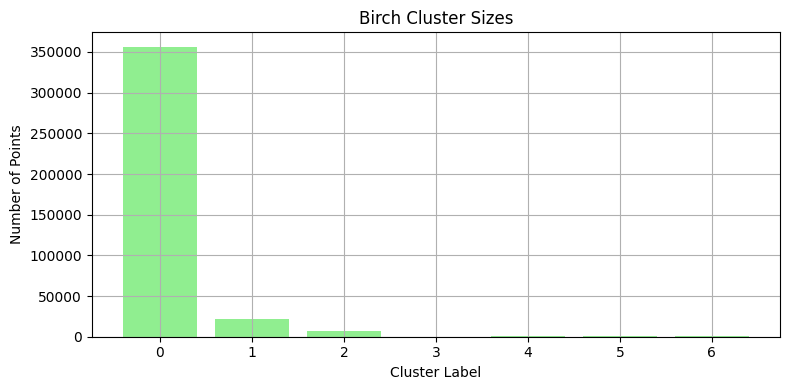

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import Counter

# Select features
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap', 'Close'
]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Sample for clustering to save RAM
sample_size = 60000
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

# Fit Birch on sample
birch = Birch(n_clusters=7)
birch.fit(X_sample)

# Predict clusters for full dataset
df['Cluster_Birch'] = birch.predict(X_scaled)

# Evaluate on sample
sil_score = silhouette_score(X_sample, birch.labels_)
print(f"\n✅ Silhouette Score (sample of {sample_size}): {sil_score:.4f}")

# Display cluster counts
cluster_counts = Counter(df['Cluster_Birch'])
print("\n📊 Points per Cluster (Birch):")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} points")

# Plot distribution
plt.figure(figsize=(8, 4))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color='lightgreen')
plt.title("Birch Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Evaluation metrics using labels from the sample
labels_sample = birch.labels_  # Labels assigned during fit on X_sample

# Compute internal clustering scores
dbi = davies_bouldin_score(X_sample, labels_sample)
chi = calinski_harabasz_score(X_sample, labels_sample)

# Output the results
print(f"\n✅ Davies-Bouldin Index (Birch): {dbi:.4f}")
print(f"✅ Calinski-Harabasz Index (Birch): {chi:.2f}")



✅ Davies-Bouldin Index (Birch): 0.9156
✅ Calinski-Harabasz Index (Birch): 14481.90


In [ ]:
import pandas as pd
import numpy as np

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Configuration
cluster_col = 'Cluster_Birch'
trading_days = 252  # Annualization factor for Sharpe Ratio

# Collect metrics for each cluster
results = []

for cluster in sorted(df[cluster_col].unique()):
    cluster_df = df[df[cluster_col] == cluster]

    for symbol, group in cluster_df.groupby('Symbol'):
        group = group.sort_values('Date')

        # Cumulative returns for drawdown calculation
        cumulative = (1 + group['Daily_Return']).cumprod()
        drawdown = cumulative / cumulative.cummax() - 1

        # Sharpe ratio and max drawdown
        std = group['Daily_Return'].std()
        sharpe = group['Daily_Return'].mean() / std * np.sqrt(trading_days) if std != 0 else np.nan
        max_dd = drawdown.min()

        results.append({
            'Cluster': cluster,
            'Symbol': symbol,
            'Sharpe_Ratio': sharpe,
            'Max_Drawdown': max_dd
        })

# Convert to DataFrame
cluster_metrics = pd.DataFrame(results)

# Compute average metrics per cluster
avg_cluster_stats = cluster_metrics.groupby('Cluster')[['Sharpe_Ratio', 'Max_Drawdown']].mean().reset_index()

# Display results
print("\n📊 Average Sharpe & Max Drawdown per Cluster:")
print(avg_cluster_stats)



📊 Average Sharpe & Max Drawdown per Cluster:
   Cluster  Sharpe_Ratio  Max_Drawdown
0        0      0.313286     -0.435106
1        1      6.792788     -0.061271
2        2      1.236577     -0.433019
3        3           NaN      0.000000
4        4     -2.629648     -0.807386
5        5      1.701510     -0.152754
6        6      0.476309     -0.186042



📊 Refined Cluster Counts:
Cluster_Birch_Refined
0_0    231638
0_1     17635
0_2        13
0_3    107067
1       21384
2        6907
3           1
4         473
5         836
6        1152
Name: count, dtype: int64

📊 Refined Cluster Counts:
Cluster_Birch_Refined
0_0    231638
0_1     17635
0_2        13
0_3    107067
1       21384
2        6907
3           1
4         473
5         836
6        1152
Name: count, dtype: int64


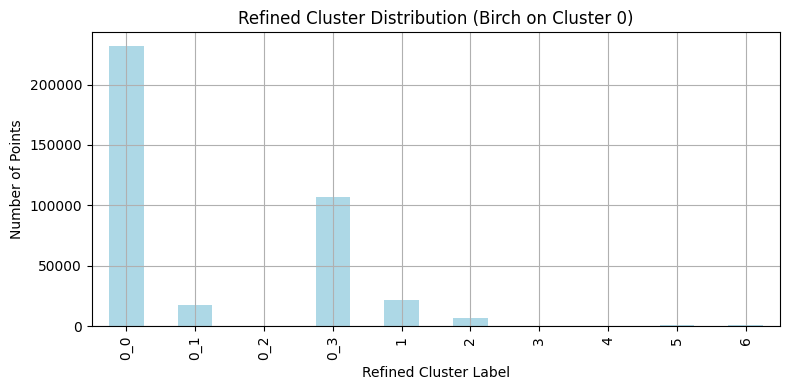

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Filter only Cluster 0
cluster_2_df = df[df['Cluster_Birch'] == 0].copy()
other_df = df[df['Cluster_Birch'] != 0].copy()

# Define features
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap', 'Close'
]

# Scale data
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(cluster_2_df[features])

# Sample before clustering
sample_size = min(20000, len(cluster_2_df))
np.random.seed(42)
sample_idx = np.random.choice(len(cluster_2_df), size=sample_size, replace=False)
X_sample = X_2_scaled[sample_idx]

# Fit Birch on sample
birch_sub = Birch(n_clusters=4)
birch_sub.fit(X_sample)

# Predict on all of Cluster 0
sub_labels = birch_sub.predict(X_2_scaled)
cluster_2_df['Cluster_Birch_Refined'] = ['0_' + str(i) for i in sub_labels]

# Keep original cluster label for others
other_df['Cluster_Birch_Refined'] = other_df['Cluster_Birch'].astype(str)

# Combine back
df_refined = pd.concat([cluster_2_df, other_df], ignore_index=True)

# Show refined cluster counts
print("\n📊 Refined Cluster Counts:")
print(df_refined['Cluster_Birch_Refined'].value_counts().sort_index())

# Optional: visualize refined cluster sizes
import matplotlib.pyplot as plt

# Count distribution
refined_counts = df_refined['Cluster_Birch_Refined'].value_counts().sort_index()

# Print counts
print("\n📊 Refined Cluster Counts:")
print(refined_counts)

# Optional bar plot
plt.figure(figsize=(8, 4))
refined_counts.plot(kind='bar', color='lightblue')
plt.title("Refined Cluster Distribution (Birch on Cluster 0)")
plt.xlabel("Refined Cluster Label")
plt.ylabel("Number of Points")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# Ensure 'Date' is datetime
df_refined['Date'] = pd.to_datetime(df_refined['Date'])

# Get refined cluster column
cluster_col = 'Cluster_Birch_Refined'
clusters = df_refined[cluster_col].unique()
results = []

trading_days = 252

# Loop through each refined cluster
for cluster in sorted(clusters):
    cluster_df = df_refined[df_refined[cluster_col] == cluster]

    for symbol, group in cluster_df.groupby('Symbol'):
        group = group.sort_values('Date')
        cumulative = (1 + group['Daily_Return']).cumprod()
        drawdown = cumulative / cumulative.cummax() - 1

        std = group['Daily_Return'].std()
        sharpe = group['Daily_Return'].mean() / std * np.sqrt(trading_days) if std != 0 else np.nan
        max_dd = drawdown.min()

        results.append({
            'Cluster_Refined': cluster,
            'Symbol': symbol,
            'Sharpe_Ratio': sharpe,
            'Max_Drawdown': max_dd
        })

# Create DataFrame and group
recluster_metrics = pd.DataFrame(results)
avg_recluster_stats = recluster_metrics.groupby('Cluster_Refined')[['Sharpe_Ratio', 'Max_Drawdown']].mean().reset_index()

print("\n📊 Average Sharpe & Max Drawdown per Refined Cluster:")
print(avg_recluster_stats)



📊 Average Sharpe & Max Drawdown per Refined Cluster:
  Cluster_Refined  Sharpe_Ratio  Max_Drawdown
0             0_0     -1.283502     -0.599416
1             0_1     -6.329924     -0.230317
2             0_2      3.957092     -0.030514
3             0_3     13.593637     -0.156236
4               1      6.792788     -0.061271
5               2      1.236577     -0.433019
6               3           NaN      0.000000
7               4     -2.629648     -0.807386
8               5      1.701510     -0.152754
9               6      0.476309     -0.186042


In [ ]:
# Step 1: Map refined cluster ratings from reclustered stats
def assign_rating(row):
    if row['Sharpe_Ratio'] > 2 and row['Max_Drawdown'] > -0.2:
        return 5
    elif row['Sharpe_Ratio'] > 1 and row['Max_Drawdown'] > -0.3:
        return 4
    elif row['Sharpe_Ratio'] > 0.5 and row['Max_Drawdown'] > -0.4:
        return 3
    elif row['Sharpe_Ratio'] > 0:
        return 2
    else:
        return 1

# Step 2: Assign ratings to each refined cluster
avg_recluster_stats['Birch_Cluster_Rating'] = avg_recluster_stats.apply(assign_rating, axis=1)

# Step 3: Merge ratings into main df (assuming df_refined has both cluster info and original index)
df['Cluster_Birch_Refined'] = df_refined['Cluster_Birch_Refined']
df = df.merge(
    avg_recluster_stats[['Cluster_Refined', 'Birch_Cluster_Rating']],
    left_on='Cluster_Birch_Refined',
    right_on='Cluster_Refined',
    how='left'
)

# Step 4: Optional cleanup
df.drop(columns=['Cluster_Refined'], inplace=True)

print("✅ Birch cluster rating successfully added to df.")


✅ Birch cluster rating successfully added to df.



✅ Silhouette Score (sample of 60000): 0.6893

📊 Points per Cluster (KMeans):
Cluster 0: 4024 points
Cluster 1: 380622 points
Cluster 2: 2460 points


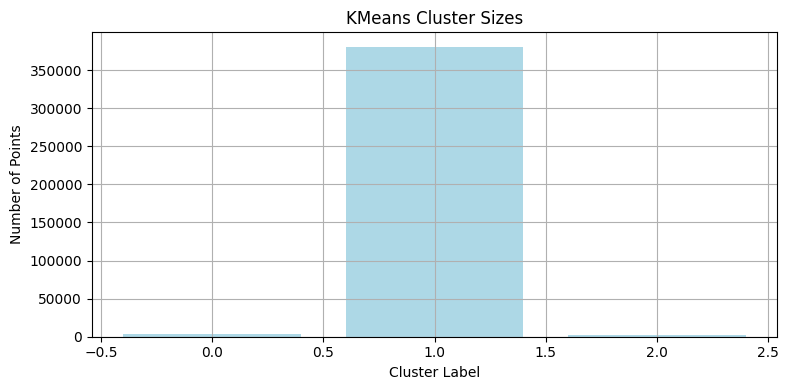

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import Counter


# Select features
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap', 'Close'
]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Sample for clustering to save RAM
sample_size = 60000
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

# Fit KMeans on sample
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_sample)

# Predict for entire dataset (after fitting)
labels = kmeans.predict(X_scaled)
df['Cluster_KMeans'] = labels

# Silhouette Score (on sample only)
sil_score = silhouette_score(X_sample, kmeans.labels_)
print(f"\n✅ Silhouette Score (sample of {sample_size}): {sil_score:.4f}")

# Cluster sizes
cluster_counts = Counter(labels)
print("\n📊 Points per Cluster (KMeans):")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} points")

# Plot
plt.figure(figsize=(8, 4))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color='lightblue')
plt.title("KMeans Cluster Sizes")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Assuming birch was fitted on X_sample
labels_kmeans = kmeans.labels_  # labels from the fit on sample

# Internal evaluation metrics
dbi = davies_bouldin_score(X_sample, labels_kmeans)
chi = calinski_harabasz_score(X_sample, labels_kmeans)

print(f"✅ Davies-Bouldin Index (kmeans): {dbi:.4f}")
print(f"✅ Calinski-Harabasz Index (kmeans): {chi:.2f}")


✅ Davies-Bouldin Index (kmeans): 0.8823
✅ Calinski-Harabasz Index (kmeans): 6121.31


In [ ]:
import pandas as pd
import numpy as np

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get list of clusters
cluster_col = 'Cluster_KMeans'  # or your cluster column
clusters = df[cluster_col].unique()
results = []

# Annualization factor
trading_days = 252

# Loop through each cluster
for cluster in sorted(clusters):
    cluster_df = df[df[cluster_col] == cluster]

    # Group by stock
    for symbol, group in cluster_df.groupby('Symbol'):
        group = group.sort_values('Date')
        cumulative = (1 + group['Daily_Return']).cumprod()
        drawdown = cumulative / cumulative.cummax() - 1

        sharpe = group['Daily_Return'].mean() / group['Daily_Return'].std() * np.sqrt(trading_days) if group['Daily_Return'].std() != 0 else np.nan
        max_dd = drawdown.min()

        results.append({
            'Cluster': cluster,
            'Symbol': symbol,
            'Sharpe_Ratio': sharpe,
            'Max_Drawdown': max_dd
        })

# Convert to DataFrame
cluster_metrics = pd.DataFrame(results)

# Average per cluster
avg_cluster_stats = cluster_metrics.groupby('Cluster')[['Sharpe_Ratio', 'Max_Drawdown']].mean().reset_index()

print("\n📊 Average Sharpe & Max Drawdown per Cluster:")
print(avg_cluster_stats)



📊 Average Sharpe & Max Drawdown per Cluster:
   Cluster  Sharpe_Ratio  Max_Drawdown
0        0      1.455980     -0.111010
1        1      0.501601     -0.410998
2        2     -0.049297     -0.599124


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Filter only Cluster 0
cluster_1_df = df[df['Cluster_KMeans'] == 1].copy()
other_df = df[df['Cluster_KMeans'] != 1].copy()

# Define features
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap', 'Close'
]

# Scale data
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(cluster_1_df[features])

# Sample before clustering
sample_size = min(20000, len(cluster_1_df))
np.random.seed(42)
sample_idx = np.random.choice(len(cluster_1_df), size=sample_size, replace=False)
X_sample = X_2_scaled[sample_idx]

# Fit Birch on sample
KMeans_sub = KMeans(n_clusters=4)
KMeans_sub.fit(X_sample)

# Predict on all of Cluster 0
sub_labels = KMeans_sub.predict(X_2_scaled)
cluster_1_df['Cluster_KMeans_Refined'] = ['1_' + str(i) for i in sub_labels]

# Keep original cluster label for others
other_df['Cluster_KMeans_Refined'] = other_df['Cluster_KMeans'].astype(str)

# Combine back
df_refined = pd.concat([cluster_1_df, other_df], ignore_index=True)

# Show refined cluster counts
print("\n📊 Refined Cluster Counts:")
print(df_refined['Cluster_KMeans_Refined'].value_counts().sort_index())



📊 Refined Cluster Counts:
Cluster_KMeans_Refined
0        4024
1_0    112255
1_1    242851
1_2        13
1_3     25503
2        2460
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Ensure 'Date' is datetime
df_refined['Date'] = pd.to_datetime(df_refined['Date'])

# Get refined cluster column
cluster_col = 'Cluster_KMeans_Refined'
clusters = df_refined[cluster_col].unique()
results = []

trading_days = 252

# Loop through each refined cluster
for cluster in sorted(clusters):
    cluster_df = df_refined[df_refined[cluster_col] == cluster]

    for symbol, group in cluster_df.groupby('Symbol'):
        group = group.sort_values('Date')
        cumulative = (1 + group['Daily_Return']).cumprod()
        drawdown = cumulative / cumulative.cummax() - 1

        std = group['Daily_Return'].std()
        sharpe = group['Daily_Return'].mean() / std * np.sqrt(trading_days) if std != 0 else np.nan
        max_dd = drawdown.min()

        results.append({
            'Cluster_Refined': cluster,
            'Symbol': symbol,
            'Sharpe_Ratio': sharpe,
            'Max_Drawdown': max_dd
        })

# Create DataFrame and group
recluster_metrics = pd.DataFrame(results)
avg_recluster_stats = recluster_metrics.groupby('Cluster_Refined')[['Sharpe_Ratio', 'Max_Drawdown']].mean().reset_index()

print("\n📊 Average Sharpe & Max Drawdown per Refined Cluster:")
print(avg_recluster_stats)



📊 Average Sharpe & Max Drawdown per Refined Cluster:
  Cluster_Refined  Sharpe_Ratio  Max_Drawdown
0               0      1.455980     -0.111010
1             1_0      3.358064     -0.186362
2             1_1     -0.456370     -0.435350
3             1_2      3.957092     -0.030514
4             1_3     -0.446766     -0.261069
5               2     -0.049297     -0.599124


In [ ]:
# Step 1: Define the rating function for KMeans refined clusters
def assign_kmeans_rating(row):
    if row['Sharpe_Ratio'] > 2 and row['Max_Drawdown'] > -0.2:
        return 5
    elif row['Sharpe_Ratio'] > 1 and row['Max_Drawdown'] > -0.3:
        return 4
    elif row['Sharpe_Ratio'] > 0.5 and row['Max_Drawdown'] > -0.4:
        return 3
    elif row['Sharpe_Ratio'] > 0:
        return 2
    else:
        return 1

# Step 2: Assign ratings to each refined KMeans cluster
# The variable 'avg_recluster_stats' was likely intended here.
avg_recluster_stats['KMeans_Cluster_Rating'] = avg_recluster_stats.apply(assign_kmeans_rating, axis=1)

# Step 3: Merge ratings into main df (assuming df_refined contains 'Cluster_KMeans_Refined')
df['Cluster_KMeans_Refined'] = df_refined['Cluster_KMeans_Refined']
df = df.merge(
    avg_recluster_stats[['Cluster_Refined', 'KMeans_Cluster_Rating']],
    left_on='Cluster_KMeans_Refined',
    right_on='Cluster_Refined',
    how='left'
)

# Step 4: Cleanup
df.drop(columns=['Cluster_Refined'], inplace=True)

print("✅ KMeans cluster rating successfully added to df.")

✅ KMeans cluster rating successfully added to df.


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Month' column
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Prepare to collect weights
markowitz_weights = []

# Group by Month
months = df['Month'].unique()
for month in tqdm(months, desc="Calculating Markowitz weights"):
    # Filter for the current month
    month_df = df[df['Month'] == month]

    # Pivot table: rows = Date, columns = Symbol, values = Daily_Return
    pivot = month_df.pivot_table(index='Date', columns='Symbol', values='Daily_Return')

    # Drop columns (symbols) with too many missing values
    pivot = pivot.dropna(axis=1, thresh=10)

    # Skip if too few stocks
    if pivot.shape[1] < 5:
        continue

    # Compute expected return and variance (mean / var)
    mean_returns = pivot.mean()
    variances = pivot.var()

    weights = mean_returns / variances
    weights = weights / weights.sum()  # Normalize to sum to 1

    # Store weights
    for symbol, weight in weights.items():
        markowitz_weights.append({
            'Symbol': symbol,
            'Month': month,
            'Markowitz_Weight': weight
        })

# Convert to DataFrame
weights_df = pd.DataFrame(markowitz_weights)

# Merge back into df
if 'Markowitz_Weight' in df.columns:
    df.drop(columns='Markowitz_Weight', inplace=True)

df = df.merge(weights_df, on=['Symbol', 'Month'], how='left')

print("✅ Markowitz weights added to main DataFrame.")


Calculating Markowitz weights: 100%|██████████| 59/59 [00:02<00:00, 24.63it/s]


✅ Markowitz weights added to main DataFrame.


In [ ]:
# Ensure 'Date' is datetime and sorted
df = df.sort_values(by=['Symbol', 'Date'])
df['Date'] = pd.to_datetime(df['Date'])

# 1. Calculate Future_Close: Next day's close price per stock
df['Future_Close'] = df.groupby('Symbol')['Close'].shift(-1)

# 2. Calculate Future_Return: Percentage return
df['Future_Return'] = (df['Future_Close'] - df['Close']) / df['Close']

# Optional: Drop rows where Future_Close or Future_Return is NaN (last row of each stock)
df = df.dropna(subset=['Future_Close', 'Future_Return'])

print("✅ Added 'Future_Close' and 'Future_Return' to the DataFrame.")


✅ Added 'Future_Close' and 'Future_Return' to the DataFrame.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
from tensorflow.keras import layers

# 1. Filter required columns
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap',
     'Markowitz_Weight'
     ,'Cluster_KMeans_Refined', 'Cluster_Birch_Refined'
]

df['Date'] = pd.to_datetime(df['Date'])
df_model = df[features + ['Future_Return', 'Symbol', 'Date']].dropna()

# 2. Split by date
train_df = df_model[df_model['Date'] < '2025-01-01']
test_df = df_model[df_model['Date'] >= '2025-01-01']

X_train = train_df[features]
y_train = train_df['Future_Return']
X_test = test_df[features]
y_test = test_df['Future_Return']

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# 4. Train Neural Network
from sklearn.metrics import mean_absolute_error

nn_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=512, verbose=0)
nn_pred = nn_model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, nn_pred)
print(f"✅ Mean Absolute Error (NN): {mae:.6f}")

583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
✅ Mean Absolute Error (NN): 0.013177


In [ ]:
# 5. Train XGBoost
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=10, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

mae = mean_absolute_error(y_test, xgb_pred)
print(f"✅ Mean Absolute Error (XGBoost): {mae:.6f}")

✅ Mean Absolute Error (XGBoost): 0.013178


In [ ]:
# 6. Train LightGBM
from sklearn.metrics import mean_absolute_error

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)

mae = mean_absolute_error(y_test, lgbm_pred)
print(f"✅ Mean Absolute Error (LightGBM): {mae:.6f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4082
[LightGBM] [Info] Number of data points in the train set: 368142, number of used features: 18
[LightGBM] [Info] Start training from score 0.000745
✅ Mean Absolute Error (LightGBM): 0.013903


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 7. Ensemble prediction
ensemble_pred = (nn_pred + xgb_pred + lgbm_pred) / 3

# 8. Attach predictions
test_df = test_df.copy().reset_index(drop=True)
test_df['Predicted_Future_Return'] = ensemble_pred


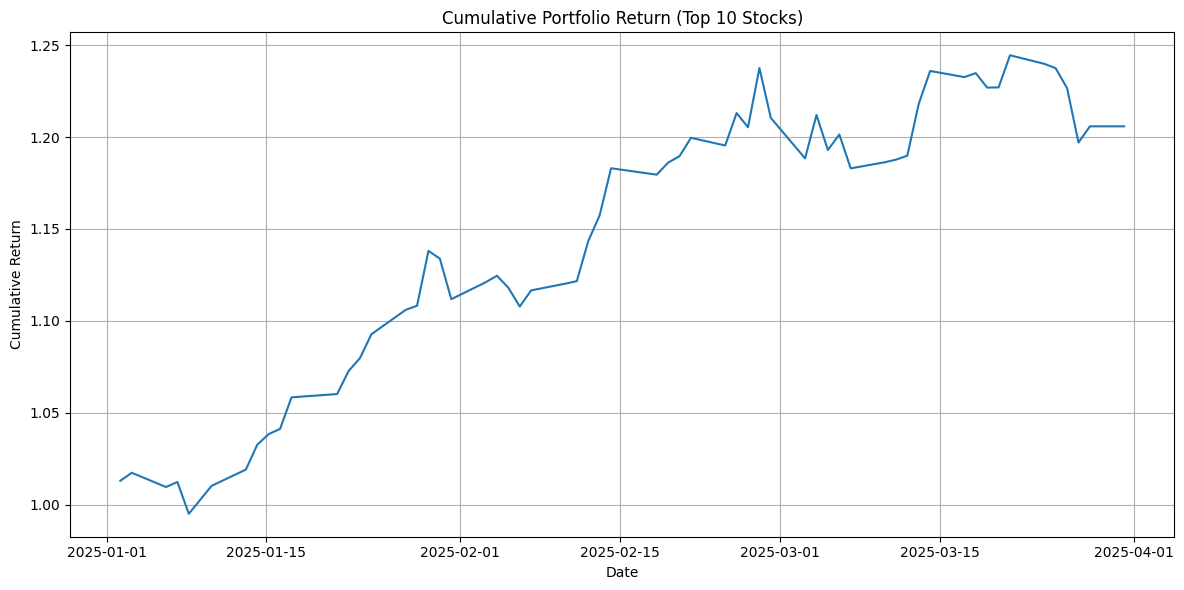


✅ Sharpe Ratio: 4.291
✅ Max Drawdown: -0.044
✅ Final Cumulative Return: 1.21


In [ ]:
# 9. Portfolio simulation
rebalance_frequency = 1
top_n = 15
unique_dates = test_df['Date'].sort_values().unique()
portfolio_returns = []

for i in range(0, len(unique_dates), rebalance_frequency):
    rebalance_date = unique_dates[i]
    date_window = unique_dates[i:i + rebalance_frequency]

    day_data = test_df[test_df['Date'] == rebalance_date]
    top_stocks = day_data.sort_values('Predicted_Future_Return', ascending=False).head(top_n)

    preds = top_stocks['Predicted_Future_Return']
    weights = np.exp(preds) / np.sum(np.exp(preds))
    weight_map = dict(zip(top_stocks['Symbol'], weights))

    for date in date_window:
        daily_data = test_df[test_df['Date'] == date]
        merged = daily_data[daily_data['Symbol'].isin(weight_map)].copy()
        merged['Weight'] = merged['Symbol'].map(weight_map)
        merged['Weight'] = merged['Weight'] / merged['Weight'].sum()

        daily_return = np.sum(merged['Weight'] * merged['Future_Return'])
        portfolio_returns.append({'Date': date, 'Portfolio_Return': daily_return})

# 10. Metrics
portfolio_df = pd.DataFrame(portfolio_returns).sort_values('Date')
portfolio_df['Cumulative_Return'] = (1 + portfolio_df['Portfolio_Return']).cumprod()
sharpe_ratio = portfolio_df['Portfolio_Return'].mean() / portfolio_df['Portfolio_Return'].std() * np.sqrt(252)
drawdown = portfolio_df['Cumulative_Return'] / portfolio_df['Cumulative_Return'].cummax() - 1
max_drawdown = drawdown.min()

# 11. Plot
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Date'], portfolio_df['Cumulative_Return'])
plt.title("Cumulative Portfolio Return (Top 10 Stocks)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Output
print(f"\n✅ Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"✅ Max Drawdown: {max_drawdown:.3f}")
print(f"✅ Final Cumulative Return: {portfolio_df['Cumulative_Return'].iloc[-1]:.2f}")

In [ ]:
import numpy as np
import pandas as pd

def compute_risk_metrics(portfolio_df, rf_rate=0.0):
    """
    Compute various portfolio risk and performance metrics.

    Parameters:
        portfolio_df (DataFrame): Must contain 'Portfolio_Return' and 'Cumulative_Return'
        rf_rate (float): Risk-free rate (default 0.0)

    Returns:
        dict: Risk and performance metrics
    """

    returns = portfolio_df['Portfolio_Return']
    cumulative = portfolio_df['Cumulative_Return']

    metrics = {}

    # Basic Stats
    metrics['Annualized Return'] = ((1 + returns.mean()) ** 252) - 1
    metrics['Annualized Volatility'] = returns.std() * np.sqrt(252)

    # Sharpe Ratio
    metrics['Sharpe Ratio'] = (returns.mean() - rf_rate) / returns.std() * np.sqrt(252)

    # Sortino Ratio
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    metrics['Sortino Ratio'] = (returns.mean() - rf_rate) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

    # Calmar Ratio
    peak = cumulative.cummax()
    drawdown = (cumulative / peak) - 1
    max_drawdown = drawdown.min()
    metrics['Max Drawdown'] = max_drawdown
    metrics['Calmar Ratio'] = metrics['Annualized Return'] / abs(max_drawdown) if max_drawdown != 0 else np.nan

    # Skewness and Kurtosis
    metrics['Skewness'] = returns.skew()
    metrics['Kurtosis'] = returns.kurtosis()

    # Value at Risk (VaR) and Conditional VaR
    metrics['VaR (95%)'] = np.percentile(returns, 5)
    metrics['CVaR (95%)'] = returns[returns <= metrics['VaR (95%)']].mean()

    return pd.DataFrame(metrics, index=["Metric"]).T.round(4)


    # Assuming you already have `portfolio_df` with 'Portfolio_Return' and 'Cumulative_Return'
risk_metrics = compute_risk_metrics(portfolio_df)
print(risk_metrics)



                        Metric
Annualized Return       1.2330
Annualized Volatility   0.1875
Sharpe Ratio            4.2905
Sortino Ratio           6.9844
Max Drawdown           -0.0441
Calmar Ratio           27.9419
Skewness               -0.2471
Kurtosis               -0.1147
VaR (95%)              -0.0182
CVaR (95%)             -0.0218


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
from tensorflow.keras import layers

# 1. Filter required columns
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap'
   # ,'Markowitz_Weight'
     ,'Cluster_KMeans_Refined', 'Cluster_Birch_Refined'
]

df['Date'] = pd.to_datetime(df['Date'])
df_model = df[features + ['Future_Return', 'Symbol', 'Date']].dropna()

# 2. Split by date
train_df = df_model[df_model['Date'] < '2025-01-01']
test_df = df_model[df_model['Date'] >= '2025-01-01']

X_train = train_df[features]
y_train = train_df['Future_Return']
X_test = test_df[features]
y_test = test_df['Future_Return']

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# 4. Train Neural Network
from sklearn.metrics import mean_absolute_error

nn_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=512, verbose=0)
nn_pred = nn_model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, nn_pred)
print(f"✅ Mean Absolute Error (NN): {mae:.6f}")

# 5. Train XGBoost
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=10, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

mae = mean_absolute_error(y_test, xgb_pred)
print(f"✅ Mean Absolute Error (XGBoost): {mae:.6f}")

# 6. Train LightGBM
from sklearn.metrics import mean_absolute_error

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)

mae = mean_absolute_error(y_test, lgbm_pred)
print(f"✅ Mean Absolute Error (LightGBM): {mae:.6f}")

# 7. Ensemble prediction
ensemble_pred = (nn_pred + xgb_pred + lgbm_pred) / 3

# 8. Attach predictions
test_df = test_df.copy().reset_index(drop=True)
test_df['Predicted_Future_Return'] = ensemble_pred


583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
✅ Mean Absolute Error (NN): 0.013179
✅ Mean Absolute Error (XGBoost): 0.013211


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 368145, number of used features: 17
[LightGBM] [Info] Start training from score 0.000745
✅ Mean Absolute Error (LightGBM): 0.013896


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


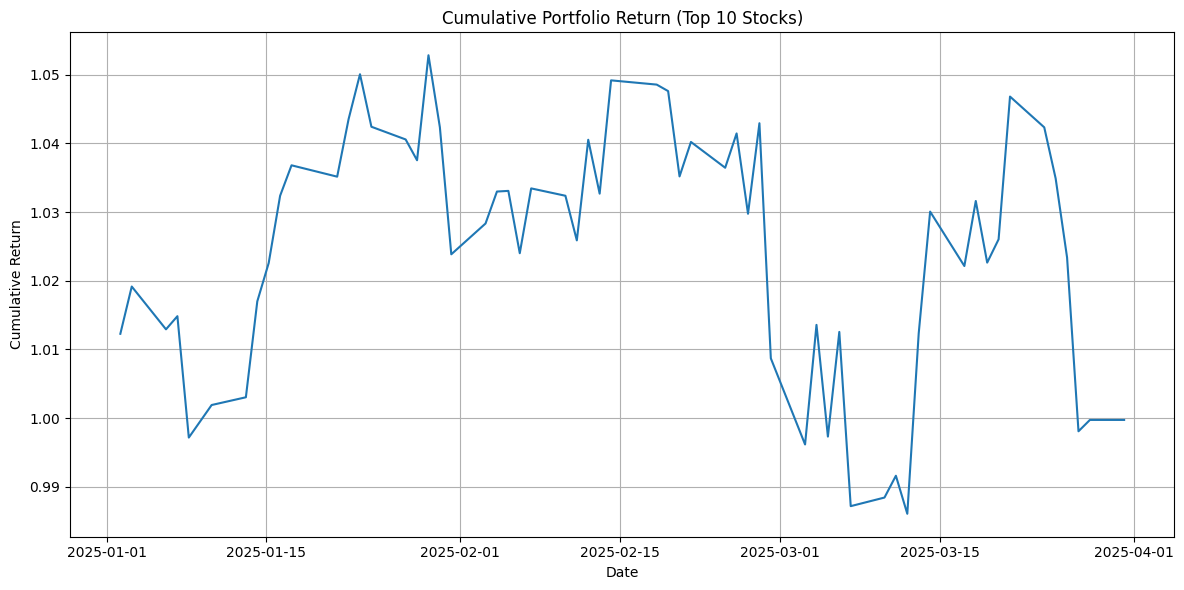


✅ Sharpe Ratio: 0.086
✅ Max Drawdown: -0.063
✅ Final Cumulative Return: 1.00


In [ ]:
# 9. Portfolio simulation
rebalance_frequency = 1
top_n = 20
unique_dates = test_df['Date'].sort_values().unique()
portfolio_returns = []

for i in range(0, len(unique_dates), rebalance_frequency):
    rebalance_date = unique_dates[i]
    date_window = unique_dates[i:i + rebalance_frequency]

    day_data = test_df[test_df['Date'] == rebalance_date]
    top_stocks = day_data.sort_values('Predicted_Future_Return', ascending=False).head(top_n)

    preds = top_stocks['Predicted_Future_Return']
    weights = np.exp(preds) / np.sum(np.exp(preds))
    weight_map = dict(zip(top_stocks['Symbol'], weights))

    for date in date_window:
        daily_data = test_df[test_df['Date'] == date]
        merged = daily_data[daily_data['Symbol'].isin(weight_map)].copy()
        merged['Weight'] = merged['Symbol'].map(weight_map)
        merged['Weight'] = merged['Weight'] / merged['Weight'].sum()

        daily_return = np.sum(merged['Weight'] * merged['Future_Return'])
        portfolio_returns.append({'Date': date, 'Portfolio_Return': daily_return})

# 10. Metrics
portfolio_df = pd.DataFrame(portfolio_returns).sort_values('Date')
portfolio_df['Cumulative_Return'] = (1 + portfolio_df['Portfolio_Return']).cumprod()
sharpe_ratio = portfolio_df['Portfolio_Return'].mean() / portfolio_df['Portfolio_Return'].std() * np.sqrt(252)
drawdown = portfolio_df['Cumulative_Return'] / portfolio_df['Cumulative_Return'].cummax() - 1
max_drawdown = drawdown.min()

# 11. Plot
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Date'], portfolio_df['Cumulative_Return'])
plt.title("Cumulative Portfolio Return (Top 10 Stocks)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Output
print(f"\n✅ Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"✅ Max Drawdown: {max_drawdown:.3f}")
print(f"✅ Final Cumulative Return: {portfolio_df['Cumulative_Return'].iloc[-1]:.2f}")

In [ ]:
import numpy as np
import pandas as pd

def compute_risk_metrics(portfolio_df, rf_rate=0.0):
    """
    Compute various portfolio risk and performance metrics.

    Parameters:
        portfolio_df (DataFrame): Must contain 'Portfolio_Return' and 'Cumulative_Return'
        rf_rate (float): Risk-free rate (default 0.0)

    Returns:
        dict: Risk and performance metrics
    """

    returns = portfolio_df['Portfolio_Return']
    cumulative = portfolio_df['Cumulative_Return']

    metrics = {}

    # Basic Stats
    metrics['Annualized Return'] = ((1 + returns.mean()) ** 252) - 1
    metrics['Annualized Volatility'] = returns.std() * np.sqrt(252)

    # Sharpe Ratio
    metrics['Sharpe Ratio'] = (returns.mean() - rf_rate) / returns.std() * np.sqrt(252)

    # Sortino Ratio
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    metrics['Sortino Ratio'] = (returns.mean() - rf_rate) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

    # Calmar Ratio
    peak = cumulative.cummax()
    drawdown = (cumulative / peak) - 1
    max_drawdown = drawdown.min()
    metrics['Max Drawdown'] = max_drawdown
    metrics['Calmar Ratio'] = metrics['Annualized Return'] / abs(max_drawdown) if max_drawdown != 0 else np.nan

    # Skewness and Kurtosis
    metrics['Skewness'] = returns.skew()
    metrics['Kurtosis'] = returns.kurtosis()

    # Value at Risk (VaR) and Conditional VaR
    metrics['VaR (95%)'] = np.percentile(returns, 5)
    metrics['CVaR (95%)'] = returns[returns <= metrics['VaR (95%)']].mean()

    return pd.DataFrame(metrics, index=["Metric"]).T.round(4)


    # Assuming you already have `portfolio_df` with 'Portfolio_Return' and 'Cumulative_Return'
risk_metrics = compute_risk_metrics(portfolio_df)
print(risk_metrics)



                       Metric
Annualized Return      0.3038
Annualized Volatility  0.2076
Sharpe Ratio           1.2788
Sortino Ratio          1.7953
Max Drawdown          -0.0805
Calmar Ratio           3.7755
Skewness              -0.6430
Kurtosis               0.2817
VaR (95%)             -0.0192
CVaR (95%)            -0.0309


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
from tensorflow.keras import layers

# 1. Filter required columns
features = [
    'Daily_Return', 'Momentum_10d', 'Volatility_14d', 'Drawdown',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'RSI_14', 'MACD', 'Signal_Line',
    'Sharpe_Ratio', 'PE_Ratio', 'ROE', 'Market_Cap'
    ,'Markowitz_Weight'
    # ,'Cluster_KMeans_Refined', 'Cluster_Birch_Refined'
]

df['Date'] = pd.to_datetime(df['Date'])
df_model = df[features + ['Future_Return', 'Symbol', 'Date']].dropna()

# 2. Split by date
train_df = df_model[df_model['Date'] < '2025-01-01']
test_df = df_model[df_model['Date'] >= '2025-01-01']

X_train = train_df[features]
y_train = train_df['Future_Return']
X_test = test_df[features]
y_test = test_df['Future_Return']

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# 4. Train Neural Network
from sklearn.metrics import mean_absolute_error

nn_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=512, verbose=0)
nn_pred = nn_model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, nn_pred)
print(f"✅ Mean Absolute Error (NN): {mae:.6f}")

# 5. Train XGBoost
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=10, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

mae = mean_absolute_error(y_test, xgb_pred)
print(f"✅ Mean Absolute Error (XGBoost): {mae:.6f}")

# 6. Train LightGBM
from sklearn.metrics import mean_absolute_error

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)

mae = mean_absolute_error(y_test, lgbm_pred)
print(f"✅ Mean Absolute Error (LightGBM): {mae:.6f}")

# 7. Ensemble prediction
ensemble_pred = (nn_pred + xgb_pred + lgbm_pred) / 3

# 8. Attach predictions
test_df = test_df.copy().reset_index(drop=True)
test_df['Predicted_Future_Return'] = ensemble_pred


564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
✅ Mean Absolute Error (NN): 0.013165
✅ Mean Absolute Error (XGBoost): 0.013128


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4069
[LightGBM] [Info] Number of data points in the train set: 368140, number of used features: 16
[LightGBM] [Info] Start training from score 0.000745
✅ Mean Absolute Error (LightGBM): 0.013751


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


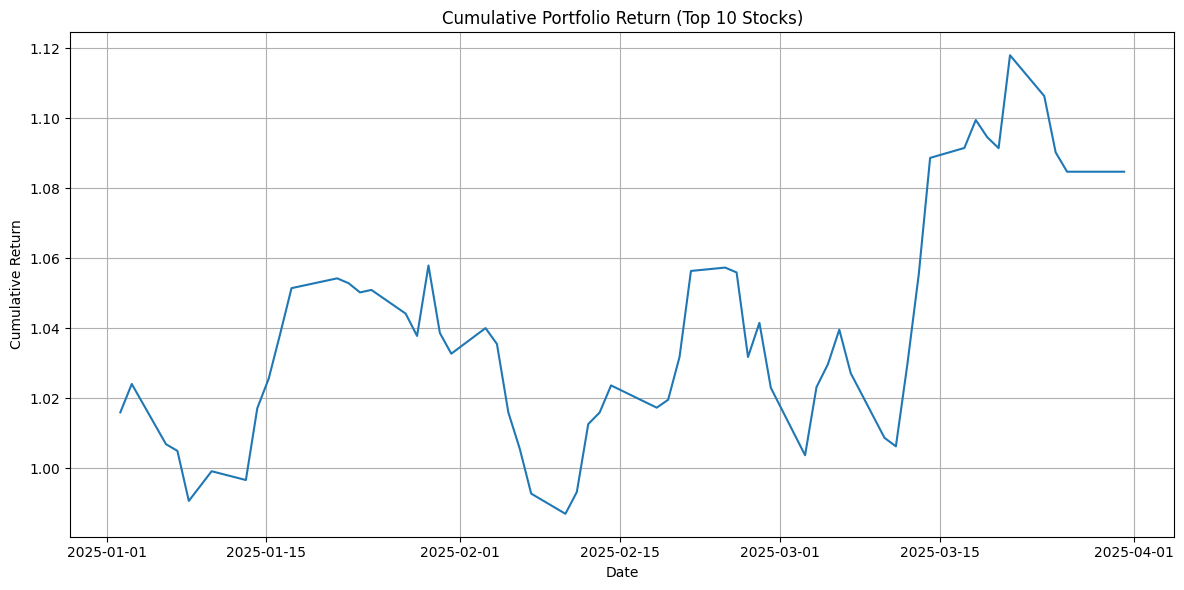


✅ Sharpe Ratio: 1.768
✅ Max Drawdown: -0.067
✅ Final Cumulative Return: 1.08


In [ ]:
# 9. Portfolio simulation
rebalance_frequency = 10
top_n = 4
unique_dates = test_df['Date'].sort_values().unique()
portfolio_returns = []

for i in range(0, len(unique_dates), rebalance_frequency):
    rebalance_date = unique_dates[i]
    date_window = unique_dates[i:i + rebalance_frequency]

    day_data = test_df[test_df['Date'] == rebalance_date]
    top_stocks = day_data.sort_values('Predicted_Future_Return', ascending=False).head(top_n)

    preds = top_stocks['Predicted_Future_Return']
    weights = np.exp(preds) / np.sum(np.exp(preds))
    weight_map = dict(zip(top_stocks['Symbol'], weights))

    for date in date_window:
        daily_data = test_df[test_df['Date'] == date]
        merged = daily_data[daily_data['Symbol'].isin(weight_map)].copy()
        merged['Weight'] = merged['Symbol'].map(weight_map)
        merged['Weight'] = merged['Weight'] / merged['Weight'].sum()

        daily_return = np.sum(merged['Weight'] * merged['Future_Return'])
        portfolio_returns.append({'Date': date, 'Portfolio_Return': daily_return})

# 10. Metrics
portfolio_df = pd.DataFrame(portfolio_returns).sort_values('Date')
portfolio_df['Cumulative_Return'] = (1 + portfolio_df['Portfolio_Return']).cumprod()
sharpe_ratio = portfolio_df['Portfolio_Return'].mean() / portfolio_df['Portfolio_Return'].std() * np.sqrt(252)
drawdown = portfolio_df['Cumulative_Return'] / portfolio_df['Cumulative_Return'].cummax() - 1
max_drawdown = drawdown.min()

# 11. Plot
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df['Date'], portfolio_df['Cumulative_Return'])
plt.title("Cumulative Portfolio Return (Top 10 Stocks)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Output
print(f"\n✅ Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"✅ Max Drawdown: {max_drawdown:.3f}")
print(f"✅ Final Cumulative Return: {portfolio_df['Cumulative_Return'].iloc[-1]:.2f}")

In [ ]:
import numpy as np
import pandas as pd

def compute_risk_metrics(portfolio_df, rf_rate=0.0):
    """
    Compute various portfolio risk and performance metrics.

    Parameters:
        portfolio_df (DataFrame): Must contain 'Portfolio_Return' and 'Cumulative_Return'
        rf_rate (float): Risk-free rate (default 0.0)

    Returns:
        dict: Risk and performance metrics
    """

    returns = portfolio_df['Portfolio_Return']
    cumulative = portfolio_df['Cumulative_Return']

    metrics = {}

    # Basic Stats
    metrics['Annualized Return'] = ((1 + returns.mean()) ** 252) - 1
    metrics['Annualized Volatility'] = returns.std() * np.sqrt(252)

    # Sharpe Ratio
    metrics['Sharpe Ratio'] = (returns.mean() - rf_rate) / returns.std() * np.sqrt(252)

    # Sortino Ratio
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    metrics['Sortino Ratio'] = (returns.mean() - rf_rate) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

    # Calmar Ratio
    peak = cumulative.cummax()
    drawdown = (cumulative / peak) - 1
    max_drawdown = drawdown.min()
    metrics['Max Drawdown'] = max_drawdown
    metrics['Calmar Ratio'] = metrics['Annualized Return'] / abs(max_drawdown) if max_drawdown != 0 else np.nan

    # Skewness and Kurtosis
    metrics['Skewness'] = returns.skew()
    metrics['Kurtosis'] = returns.kurtosis()

    # Value at Risk (VaR) and Conditional VaR
    metrics['VaR (95%)'] = np.percentile(returns, 5)
    metrics['CVaR (95%)'] = returns[returns <= metrics['VaR (95%)']].mean()

    return pd.DataFrame(metrics, index=["Metric"]).T.round(4)


    # Assuming you already have `portfolio_df` with 'Portfolio_Return' and 'Cumulative_Return'
risk_metrics = compute_risk_metrics(portfolio_df)
print(risk_metrics)



                       Metric
Annualized Return      0.4363
Annualized Volatility  0.2050
Sharpe Ratio           1.7675
Sortino Ratio          3.4136
Max Drawdown          -0.0671
Calmar Ratio           6.5034
Skewness               0.2408
Kurtosis              -0.5024
VaR (95%)             -0.0183
CVaR (95%)            -0.0202
